<h1 align='center'>Classifier Results - Preliminary Observation</h1>

<p>Here we try to run some trained classifiers for observing their results in different scenarios.</p>

In [1]:
import os
import pickle
#models_dir = '/media/fernando/DADOS/UNICAMP/PHD/models/2017-12-15'
models_dir = '../models'
dataset_dir = '../datasets'

<p>Loading models and datasets. We have a dataset with emolex info and features reduced using SVD and a dataframe containing texts and classes tagged.</p>

In [2]:
# load auto tagged test set
test_set = pickle.load(open(os.path.join(dataset_dir, 'tweets_auto-tagged-emolex_svd_test.pkl'), "rb" ), encoding='latin1') 


In [3]:
print(test_set.shape)

(55631, 200)


In [4]:
import pandas as pd
dataframe_test = pd.read_csv(os.path.join(dataset_dir, 'tweets_auto-tagged-emolex_test.csv'), engine='c')


<p>Adding emolex features to the test set and normalizing.</p>

In [5]:
import numpy as np

print(dataframe_test.shape)

for dim in ["emolex_joy","emolex_sad","emolex_trust",\
                "emolex_disgust","emolex_anger","emolex_fear",\
                "emolex_anticipation","emolex_surprise",\
                "emolex_positive","emolex_negative"]:        
        test_set = np.c_[test_set, dataframe_test[dim]]

print(test_set)

(55631, 24)
[[ 0.09387412  0.0457084  -0.0173324  ...  0.          0.
   0.        ]
 [ 0.02907222 -0.02206971 -0.01036495 ...  0.          0.
   0.        ]
 [ 0.08603186 -0.04104397 -0.01065691 ...  1.          0.
   0.        ]
 ...
 [ 0.0887548   0.03662109 -0.04805658 ...  0.          0.
   0.        ]
 [ 0.04753961  0.03624866 -0.02545119 ...  0.          0.
   0.        ]
 [ 0.02721201 -0.02100175  0.00193473 ...  0.          0.
   0.        ]]


In [6]:
print(test_set.shape)
normalizer = pickle.load(open(os.path.join(models_dir, 'normalizer.pkl'), "rb" ), encoding='latin1') 
test_set = normalizer.transform(test_set)
print(test_set.shape)
print(test_set)

(55631, 210)


/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator Normalizer from version 0.18.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


(55631, 210)
[[ 0.25157183  0.12249324 -0.04644883 ...  0.          0.
   0.        ]
 [ 0.07144299 -0.05423482 -0.02547116 ...  0.          0.
   0.        ]
 [ 0.07188346 -0.03429407 -0.00890433 ...  0.83554467  0.
   0.        ]
 ...
 [ 0.22641247  0.09341998 -0.12259178 ...  0.          0.
   0.        ]
 [ 0.23651602  0.18034202 -0.12662312 ...  0.          0.
   0.        ]
 [ 0.07073602 -0.05459281  0.00502923 ...  0.          0.
   0.        ]]


<p>Loading SVM classifier.</p>

In [7]:
clf = {}


clf['JOY-vs-SAD'] = pickle.load(open(os.path.join(models_dir, 
                    'classifier_JOY_vs_SAD_emolex.pkl'), 'rb'), 
            encoding='latin1')

clf['TRU-vs-DIS'] = pickle.load(open(os.path.join(models_dir, 
                    'classifier_TRU_vs_DIS_emolex.pkl'), 'rb'), 
            encoding='latin1')

clf['ANG-vs-FEA'] = pickle.load(open(os.path.join(models_dir, 
                    'classifier_ANG_vs_FEA_emolex.pkl'), 'rb'), 
            encoding='latin1')

clf['ANT-vs-SUR'] = pickle.load(open(os.path.join(models_dir, 
                    'classifier_ANT_vs_SUR_emolex.pkl'), 'rb'), 
            encoding='latin1')

for emo in ['JOY', 'SAD', 'TRU', 'DIS', 'ANT', 'SUR', 'ANG', 'FEA']:    
    clf['%s-vs-all' % emo] = pickle.load(open(os.path.join(models_dir,                         
                                                           'classifier_%s_vs_all_emolex.pkl' % emo), 'rb'), 
            encoding='latin1')


'''print(clf['JOY-vs-SAD'])
print(clf['TRU-vs-DIS'])
print(clf['ANG-vs-FEA'])
print(clf['ANT-vs-SUR'])'''

for emo in ['JOY', 'SAD', 'TRU', 'DIS', 'ANT', 'SUR', 'ANG', 'FEA']:
    print(emo)
    print(clf['%s-vs-all' % emo])


/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVC from version 0.18.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


JOY
SVC(C=52.668388819425516, cache_size=500, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.2197823335698515,
  kernel='rbf', max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=99)
SAD
SVC(C=319.84852518120147, cache_size=500, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.053922197822954314,
  kernel='rbf', max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=99)
TRU
SVC(C=301.52690660223254, cache_size=500, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.19179211947828953,
  kernel='rbf', max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=99)
DIS
SVC(C=129.67065651370586, cache_size=500, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.4864106889370999,
  kernel='rbf', max_iter=10000, probability=True, random_state=None,
  shrinking=Tr

In [8]:
for emo in [('JOY', 'SAD'), ('TRU', 'DIS'), ('ANT', 'SUR'), ('ANG', 'FEA')]:
    print(emo)
    print(clf['%s-vs-%s' % emo])

('JOY', 'SAD')
SVC(C=65.2568802995576, cache_size=500, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5303448165508777,
  kernel='poly', max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=99)
('TRU', 'DIS')
SVC(C=68.48072457530404, cache_size=500, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.3880785833916345,
  kernel='poly', max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=99)
('ANT', 'SUR')
SVC(C=84.8279074992487, cache_size=500, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.6716433859114492,
  kernel='poly', max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=99)
('ANG', 'FEA')
SVC(C=54.16960395459388, cache_size=500, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.33683143161844553,
  kernel='poly', max_iter=10000, probability

In [25]:
def extract_emos_attrs_n_class(dataframe, attrs, emo1, emo2):
    train_emos_indexes = [i for i in range(dataframe.shape[0]) \
    if (dataframe[emo1][i] == 1 and dataframe[emo2][i] == 0) or (dataframe[emo2][i] == 1 and dataframe[emo1][i] == 0)]
    emos_class_list = []
    for i in train_emos_indexes:
        if dataframe[emo1][i] == 1:
            emos_class_list.append(1)
        else:
            emos_class_list.append(0)
    
    emos_class = np.array(emos_class_list)
    emos_attrs = attrs[train_emos_indexes]    
    return emos_class, emos_attrs, train_emos_indexes

Y, X, indexes = extract_emos_attrs_n_class(dataframe_test, test_set, 'JOY', 'SAD')
print(dataframe_test.shape)
print(test_set.shape)
print(X.shape)
print(X)

(55631, 24)
(55631, 210)
(36540, 210)
[[ 0.07144299 -0.05423482 -0.02547116 ...  0.          0.
   0.        ]
 [ 0.07188346 -0.03429407 -0.00890433 ...  0.83554467  0.
   0.        ]
 [ 0.07568781 -0.06679344 -0.01105714 ...  0.          0.
   0.        ]
 ...
 [ 0.04651313 -0.0476956   0.0011103  ...  0.          0.
   0.        ]
 [ 0.22641247  0.09341998 -0.12259178 ...  0.          0.
   0.        ]
 [ 0.07073602 -0.05459281  0.00502923 ...  0.          0.
   0.        ]]


<p>Observing the first 30 samples</p>

In [10]:
# Observing the first 30 samples
for i in range(30):    
    print('tweet: %s' % dataframe_test['text'][indexes[i]])
    pred = clf['JOY-vs-SAD'].predict_proba([X[i]])
    print('Real: %s' % 'SAD' if Y[i] == 0 else 'JOY')
    print('Predicted: SAD (%.02f), JOY (%.02f)' % (pred[0][0], pred[0][1]))
    print('\n')

tweet: e já tem gente roubando minha cantada 󾍂󾍂
e nem me chamaram de bota #chateada
Real: SAD
Predicted: SAD (0.81), JOY (0.19)


tweet: o que eu espero de 2016? #recomeço  uma nova chance de conseguir!  de ser #feliz  .. — se sentindo esperançosa
JOY
Predicted: SAD (0.64), JOY (0.36)


tweet: a minha progenitora só liga aos likes
#triste #facadaenmicorazon
Real: SAD
Predicted: SAD (0.87), JOY (0.13)


tweet: não to achando o tt q eu via gif de gatinho to bem #triste #deprimida #emo
Real: SAD
Predicted: SAD (0.35), JOY (0.65)


tweet: um pedacinho de mim... #tomeamando #feliz #debemxomigomesmo… https://t.co/2rdqrpclnf
JOY
Predicted: SAD (0.48), JOY (0.52)


tweet: hoje meu dia esta em #luto tailine entrou em um relacionamento sério &lt,/3
Real: SAD
Predicted: SAD (0.64), JOY (0.36)


tweet: vida boa e feliz vai deixar deixar sdds #luto
Real: SAD
Predicted: SAD (0.51), JOY (0.49)


tweet: gostei de um vídeo @youtube de @talinho_gamer https://t.co/er23vemtan realmente eu não sei jogar sk

<h2>Observing probabilities for other classes.</h2>

In [ ]:
Y, X, indexes = extract_emos_attrs_n_class(dataframe_test, test_set, 'TRU', 'DIS')
print(dataframe_test.shape)
print(test_set.shape)
print(X.shape)

In [ ]:
# Observing the first 30 samples of TRU and DIS
for i in range(30):
    pred = clf['JOY-vs-SAD'].predict_proba([X[i]])
    print('tweet: %s' % dataframe_test['text'][indexes[i]])
    print('Real: %s' % 'DIS' if Y[i] == 0 else 'TRU')
    print('Predicted: SAD (%.02f), JOY (%.02f)' % (pred[0][0], pred[0][1]))
    print('\n')

<p>Observing results for Anger vs Fear</p>

In [ ]:
Y, X, indexes = extract_emos_attrs_n_class(dataframe_test, test_set, 'FEA', 'ANG')
# Observing the first 30 samples of FEA and ANG
for i in range(30):
    pred = clf['JOY-vs-SAD'].predict_proba([X[i]])
    print('tweet: %s' % dataframe_test['text'][indexes[i]])
    print('Real: %s' % 'ANG' if Y[i] == 0 else 'FEA')
    print('Predicted: SAD (%.02f), JOY (%.02f)' % (pred[0][0], pred[0][1]))
    print('\n')

<h2>Visualizing ROC curve for neutral vs emotions</h2>

In [11]:
exp_dir = '../models'
clf = pickle.load(open(os.path.join(exp_dir, 'probs_train_neutral.pkl'), 'rb'))

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

emotions = [('SAD', 'JOY'), ('DIS', 'TRU'), ('FEA', 'ANG'), ('SUR', 'ANT')]

for emo_pair in emotions:
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])
    
    for i in range(0,2):
        
        roc_auc = auc(clf[emo_pair_key][emo_pair[i]]['roc-fpr'], clf[emo_pair_key][emo_pair[i]]['roc-tpr'])
        
        plt.plot(clf[emo_pair_key][emo_pair[i]]['roc-fpr'], clf[emo_pair_key][emo_pair[i]]['roc-tpr'], color='b', lw=2, alpha=0.3,
                 label='ROC emotion %s vs Neutral (AUC = %0.2f)' % (emo_pair[i], roc_auc))

        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)        

        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for %s' % emo_pair[i])
        plt.legend(loc="lower right")
        
        ax2 = plt.gca().twinx()
        ax2.plot(clf[emo_pair_key][emo_pair[i]]['roc-fpr'], 
                 clf[emo_pair_key][emo_pair[i]]['roc-thresholds'], 
                 markeredgecolor='r',linestyle='dashed', color='g')
        ax2.set_ylabel('Threshold',color='g')
        ax2.set_ylim([clf[emo_pair_key][emo_pair[i]]['roc-thresholds'][-1],
                      clf[emo_pair_key][emo_pair[i]]['roc-thresholds'][0]])
        ax2.set_xlim([clf[emo_pair_key][emo_pair[i]]['roc-fpr'][0],
                      clf[emo_pair_key][emo_pair[i]]['roc-fpr'][-1]])
        
        
        plt.show()
        
        j = 0
        while clf[emo_pair_key][emo_pair[i]]['roc-fpr'][j] < 0.3:
            j += 1
        print("Choosen Threshold = %.3f" % clf[emo_pair_key][emo_pair[i]]['roc-thresholds'][j])
        print("True positive rate = %.3f" % clf[emo_pair_key][emo_pair[i]]['roc-tpr'][j])

<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.766
True positive rate = 0.513


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.431
True positive rate = 0.918


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.786
True positive rate = 0.952


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.608
True positive rate = 0.949


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.847
True positive rate = 0.659


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.214
True positive rate = 0.851


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.969
True positive rate = 0.434


<Figure size 640x480 with 2 Axes>

Choosen Threshold = 0.043
True positive rate = 1.000


<h2>Testing Benchmark classifiers</h2>

In [13]:
import os
import sys
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
import pandas as pd
import numpy as np

sys.path.append(os.path.join(os.getcwd(), '..'))

from nlp_utils.nlp_bag_of_words import df_tfidf_train_test_split
from experiments.experiments_utils import *


normalizer = pickle.load(open(os.path.join(models_dir, 'normalizer.pkl'), "rb" ), encoding='latin1')
    
stock_svd_train, stock_svd_test, stock_dataframe_train, stock_dataframe_test = load_dataframe(os.path.join(dataset_dir,
                                                                                                'tweets_stocks_emolex.csv'), 
                                                                                              models_dir)
    
        
stock_svd_and_emolex_train, stock_svd_and_emolex_test = add_emolex_features(stock_svd_train, 
                                                                    stock_svd_test, stock_dataframe_train, 
                                                                    stock_dataframe_test, normalizer)
            

print(stock_svd_train.shape)
print(stock_svd_test.shape)

/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator Normalizer from version 0.18.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


(69, 200)
(12, 200)


In [14]:
results = {}

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

def benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, exp_name, corpus_name, alg_name):
    pool1 = pool.apply_async(clf[clf_key]['model'].predict_proba, [X])
    pool2 = pool.apply_async(clf[clf_key]['model'].predict, [X])
    
    Y_prob = pool1.get()
    Y_pred_ = pool2.get()                
            
        
    #Y_pred = [0 if pred == 0 and prob[0] >= clf[clf_key][key_0]['threshold'] else \
    #          1 if pred == 1 and prob[1] >= clf[clf_key][key_1]['threshold'] else \
    #          2 for pred, prob in zip(Y_pred_, Y_prob)]
        
    Y_pred = [2 if prob[0] < clf[clf_key][key_0]['threshold'] and \
              prob[1] < clf[clf_key][key_1]['threshold'] else \
              pred for pred, prob in zip(Y_pred_, Y_prob)]                        
    
    f1_neutral = f1_score(Y, Y_pred, average='macro')
    acc_neutral = accuracy_score(Y, Y_pred)
    
    #fpr_neutral, tpr_neutral, threshoulds_neutral = roc_curve(Y_pred, Y_prob)
    #roc_auc_neutral = auc(fpr_neutral, tpr_neutral)
    
    
    f1 = f1_score(Y, Y_pred_, average='macro')
    acc = accuracy_score(Y, Y_pred_)
    
    Y_prob_emo = []
    Y_emo = []
    Y_neutral_emo = [[], []]    
    Y_prob_neutral_emo = [[],[]]    
    for y, prob in zip(Y, Y_prob):
        if y in [0, 1]:
            Y_emo.append(y)
            Y_prob_emo.append(prob[1])
            Y_neutral_emo[y].append(1)
            Y_prob_neutral_emo[y].append(prob[y])
        else:
            for i in range(2):
                Y_neutral_emo[i].append(0)
                Y_prob_neutral_emo[i].append(prob[i])
        
            
    fpr, tpr, threshoulds = roc_curve(Y_emo, Y_prob_emo)
    roc_auc = auc(fpr, tpr)
    
    
    fpr_neutral = [0] * 2
    tpr_neutral = [0] * 2
    threshoulds_neutral = [0] * 2
    roc_auc_neutral = [0] * 2
    for i in range(2):
        fpr_neutral[i], tpr_neutral[i], threshoulds_neutral[i] = roc_curve(Y_neutral_emo[i], \
                                                                             Y_prob_neutral_emo[i])
        roc_auc_neutral[i] = auc(fpr_neutral[i], tpr_neutral[i])
    
    
    if not exp_name in results.keys():
        results[exp_name] = {}
        
    if not corpus_name in results[exp_name].keys():
        results[exp_name][corpus_name] = {}
        
    if not alg_name in results[exp_name][corpus_name].keys():
        results[exp_name][corpus_name][alg_name] = {clf_key:{key:None for key in \
                                                             ['f1', 'acc', 'fpr', \
                                                              'tpr', 'threshoulds', 'roc_auc', \
                                                             'f1_neutral', 'acc_neutral', 'fpr_neutral', \
                                                              'tpr_neutral', 'threshoulds_neutral', \
                                                              'roc_auc_neutral']}}
        
    if not clf_key in results[exp_name][corpus_name][alg_name].keys():
        results[exp_name][corpus_name][alg_name][clf_key] = {key:None for key in \
                                                             ['f1', 'acc', 'fpr', \
                                                              'tpr', 'threshoulds', 'roc_auc', \
                                                             'f1_neutral', 'acc_neutral', 'fpr_neutral', \
                                                              'tpr_neutral', 'threshoulds_neutral', \
                                                              'roc_auc_neutral']}
        
    results[exp_name][corpus_name][alg_name][clf_key]['y'] = Y
    results[exp_name][corpus_name][alg_name][clf_key]['y_pred'] = Y_pred_
    results[exp_name][corpus_name][alg_name][clf_key]['y_pred_neutral'] = Y_pred
    
    results[exp_name][corpus_name][alg_name][clf_key]['f1'] = f1
    results[exp_name][corpus_name][alg_name][clf_key]['acc'] = acc
    results[exp_name][corpus_name][alg_name][clf_key]['fpr'] = fpr
    results[exp_name][corpus_name][alg_name][clf_key]['tpr'] = tpr
    results[exp_name][corpus_name][alg_name][clf_key]['threshoulds'] = threshoulds
    results[exp_name][corpus_name][alg_name][clf_key]['roc_auc'] = roc_auc
    
    results[exp_name][corpus_name][alg_name][clf_key]['f1_neutral'] = f1_neutral
    results[exp_name][corpus_name][alg_name][clf_key]['acc_neutral'] = acc_neutral
    
    emo_keys = [key_0, key_1]
    results[exp_name][corpus_name][alg_name][clf_key]['fpr_neutral'] = {}
    results[exp_name][corpus_name][alg_name][clf_key]['tpr_neutral'] = {}
    results[exp_name][corpus_name][alg_name][clf_key]['threshoulds_neutral'] = {}
    results[exp_name][corpus_name][alg_name][clf_key]['roc_auc_neutral'] = {}
    for i in range(2):
        results[exp_name][corpus_name][alg_name][clf_key]['fpr_neutral'][emo_keys[i]] = fpr_neutral[i]
        results[exp_name][corpus_name][alg_name][clf_key]['tpr_neutral'][emo_keys[i]] = tpr_neutral[i]
        results[exp_name][corpus_name][alg_name][clf_key]['threshoulds_neutral'][emo_keys[i]] = threshoulds_neutral[i]
        results[exp_name][corpus_name][alg_name][clf_key]['roc_auc_neutral'][emo_keys[i]] = roc_auc_neutral[i]
    
        
    print(classification_report(Y, Y_pred, target_names=[key_0, key_1, 'neutral']))
        
    print("\t\tConfusion Matrix: ")
    conf_matrix = confusion_matrix(Y, Y_pred)
        
    print("Predicted as:\t%s\t%s\t%s" % (key_0, key_1, "neutral"))
    print("%s tweets:\t%d\t%d\t%d" % (key_0, conf_matrix[0][0], conf_matrix[0][1], conf_matrix[0][2]))
    print("%s tweets:\t%d\t%d\t%d" % (key_1, conf_matrix[1][0], conf_matrix[1][1], conf_matrix[1][2]))
    print("%s tweets:\t%d\t%d\t%d" % ("neutral", conf_matrix[2][0], conf_matrix[2][1], conf_matrix[2][2]))
        
    print('\n')

In [15]:
import matplotlib.pyplot as plt

emotions = [('SAD', 'JOY'), ('DIS', 'TRU'), ('FEA', 'ANG'), ('SUR', 'ANT')]

def print_roc_curve(results, emo_pair, exp_name, corpus_name, alg_name):
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])                                

    plt.figure()
    if exp_name == 'emo-vs-emo-vs-neutral':
        roc_auc = results[exp_name][corpus_name][alg_name][emo_pair_key]['roc_auc_neutral'][emo_pair[1]]
        
        plt.plot(results[exp_name][corpus_name][alg_name][emo_pair_key]['fpr_neutral'][emo_pair[1]], \
                 results[exp_name][corpus_name][alg_name][emo_pair_key]['tpr_neutral'][emo_pair[1]], \
                 color='b', lw=2, alpha=0.3,
                 label='ROC for %s-vs-Neutral (AUC = %0.2f)' % (emo_pair[1], \
                                                     roc_auc))
        
        roc_auc = results[exp_name][corpus_name][alg_name][emo_pair_key]['roc_auc_neutral'][emo_pair[0]]
        
        plt.plot(results[exp_name][corpus_name][alg_name][emo_pair_key]['fpr_neutral'][emo_pair[0]], \
                 results[exp_name][corpus_name][alg_name][emo_pair_key]['tpr_neutral'][emo_pair[0]], \
                 color='g', lw=2, alpha=0.3,
                 label='ROC for %s-vs-Neutral (AUC = %0.2f)' % (emo_pair[0], \
                                                     roc_auc))
    else:
        roc_auc = results[exp_name][corpus_name][alg_name][emo_pair_key]['roc_auc']
    
        plt.plot(results[exp_name][corpus_name][alg_name][emo_pair_key]['fpr'], \
                 results[exp_name][corpus_name][alg_name][emo_pair_key]['tpr'], \
                 color='b', lw=2, alpha=0.3,
                 label='ROC for %s (AUC = %0.2f)' % (emo_pair_key, \
                                                     roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)        

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for %s' % emo_pair_key)
    plt.legend(loc="lower right")

    #ax2 = plt.gca().twinx()
    #ax2.plot(results[exp_name][corpus_name][alg_name][emo_pair_key]['fpr'], 
    #         results[exp_name][corpus_name][alg_name][emo_pair_key]['thresholds'], 
    #         markeredgecolor='r',linestyle='dashed', color='g')
    #ax2.set_ylabel('Threshold',color='g')
    #ax2.set_ylim([clf[emo_pair_key][emo_pair[i]]['roc-thresholds'][-1],
    #              clf[emo_pair_key][emo_pair[i]]['roc-thresholds'][0]])
    #ax2.set_xlim([clf[emo_pair_key][emo_pair[i]]['roc-fpr'][0],
    #              clf[emo_pair_key][emo_pair[i]]['roc-fpr'][-1]])

    
    plt.savefig('visualization/roc-%s-%s-%s-svd-200-%s.png' % (emo_pair_key, exp_name, corpus_name, alg_name))
    plt.show()

In [16]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



In [ ]:
from multiprocessing import Pool

def benchmark_classifier_one_vs_all(clf, emo, clf_key, dataframe, attrs, exp_name, corpus_name, alg_name):
    Y = dataframe[emo]
    X = attrs
    
    Y_pred = clf[clf_key].predict(X)
                                       
            
    f1 = f1_score(Y, Y_pred, average='macro')
    acc = accuracy_score(Y, Y_pred)
    
    if not exp_name in results.keys():
        results[exp_name] = {}
        
    if not corpus_name in results[exp_name].keys():
        results[exp_name][corpus_name] = {}
        
    if not alg_name in results[exp_name][corpus_name].keys():
        results[exp_name][corpus_name][alg_name] = {clf_key:{'f1':None, 'acc': None}}
        
    if not clf_key in results[exp_name][corpus_name][alg_name].keys():
        results[exp_name][corpus_name][alg_name][clf_key] = {'f1':None, 'acc': None}
        
    results[exp_name][corpus_name][alg_name][clf_key]['f1'] = f1
    results[exp_name][corpus_name][alg_name][clf_key]['acc'] = acc
    
        
    #print(classification_report(Y, Y_pred, target_names=['TRU', 'DIS','JOY','SAD', 'ANT', 'SUR', 'ANG', 'FEA']))
    print(classification_report(Y, Y_pred))
        
    #print("\t\tConfusion Matrix: ")
    #conf_matrix = confusion_matrix(Y, Y_pred)
    
    #plot_confusion_matrix(Y, Y_pred, classes=['TRU', 'DIS','JOY','SAD', 'ANT', 'SUR', 'ANG', 'FEA'],
    #                  title='Confusion matrix')

    print('\n')

In [ ]:
import pprint

pprint.pprint(clf)

In [17]:
from multiprocessing import Pool

pool = Pool()

emos = [('JOY', 'SAD'), ('TRU', 'DIS'), ('ANT', 'SUR'), ('ANG', 'FEA')]

clf_keys = ["%s-vs-%s" % emo for emo in emos]

#for clf_key in clf.keys():
for i in range(len(clf_keys)):
    
        clf_key = clf_keys[i]
        key_0 = emos[i][1]
        key_1 = emos[i][0]
                
        #key_0 = list(clf[clf_key].keys())[2]
        #key_1 = list(clf[clf_key].keys())[3]
    
        Y, X, indexes = extract_emos_attrs_n_class(dataframe_test, test_set, key_1, key_0)
    
        print("Testing emotion vs emotion")
        benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, "emo-vs-emo", "free-domain", "svm")
    
        print("Testing emotion vs emotion vs neutral")
        Y_neutral, X_neutral, indexes_neutral = extract_neutral_attrs_n_class(dataframe_test, 
                                                                              test_set, key_1, key_0)
    
        
        
        X = np.concatenate((X, X_neutral), axis=0)
        Y = np.concatenate((Y, np.array([2] * len(Y_neutral))), axis=0)
        benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, "emo-vs-emo-vs-neutral", "free-domain", "svm")
   
        

Testing emotion vs emotion


/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/ranking.py:648: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/ranking.py:114: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         SAD       0.87      0.66      0.75     22167
         JOY       0.71      0.60      0.65     14373
     neutral       0.00      0.00      0.00         0

   micro avg       0.64      0.64      0.64     36540
   macro avg       0.53      0.42      0.47     36540
weighted avg       0.81      0.64      0.71     36540

		Confusion Matrix: 
Predicted as:	SAD	JOY	neutral
SAD tweets:	14723	3463	3981
JOY tweets:	2286	8657	3430
neutral tweets:	0	0	0


Testing emotion vs emotion vs neutral


/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         SAD       0.66      0.66      0.66     22167
         JOY       0.59      0.60      0.59     14373
     neutral       0.22      0.21      0.21     10052

   micro avg       0.55      0.55      0.55     46592
   macro avg       0.49      0.49      0.49     46592
weighted avg       0.54      0.55      0.54     46592

		Confusion Matrix: 
Predicted as:	SAD	JOY	neutral
SAD tweets:	14723	3463	3981
JOY tweets:	2286	8657	3430
neutral tweets:	5312	2648	2092


Testing emotion vs emotion
              precision    recall  f1-score   support

         DIS       0.94      0.43      0.59      1848
         TRU       0.93      0.31      0.47      1093
     neutral       0.00      0.00      0.00         0

   micro avg       0.39      0.39      0.39      2941
   macro avg       0.62      0.25      0.35      2941
weighted avg       0.93      0.39      0.55      2941

		Confusion Matrix: 
Predicted as:	DIS	TRU	neutral
DIS tweets:	803	27	10

In [18]:
emotions = [('SAD', 'JOY'), ('DIS', 'TRU'), ('FEA', 'ANG'), ('SUR', 'ANT')]
for emo_pair in emotions:
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])
    print("%s %.02f" % (emo_pair[0], clf[emo_pair_key][emo_pair[0]]['threshold']))
    print("%s %.02f" % (emo_pair[1], clf[emo_pair_key][emo_pair[1]]['threshold']))

SAD 0.69
JOY 0.40
DIS 0.90
TRU 0.84
FEA 0.83
ANG 0.31
SUR 0.95
ANT 0.89


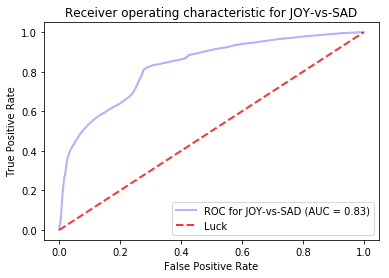

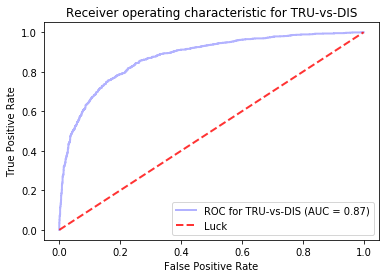

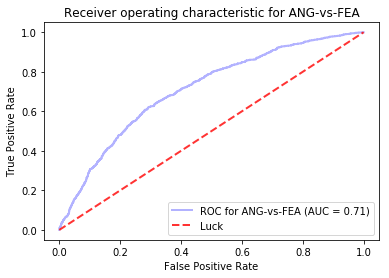

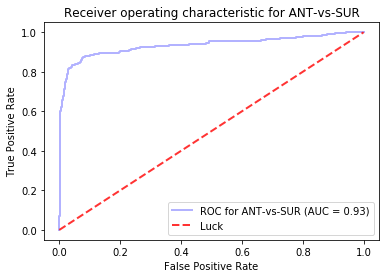

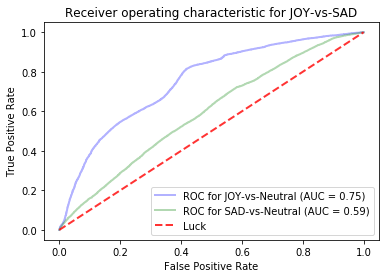

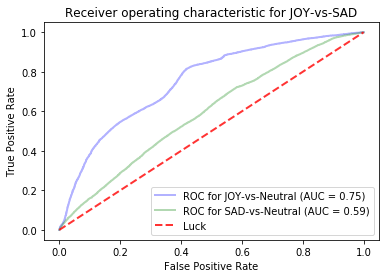

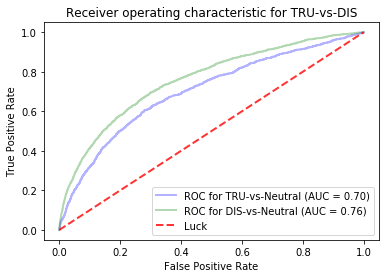

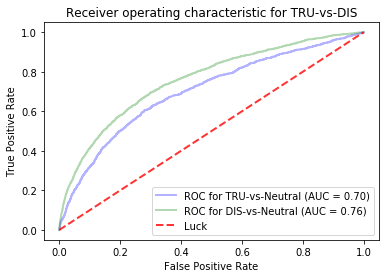

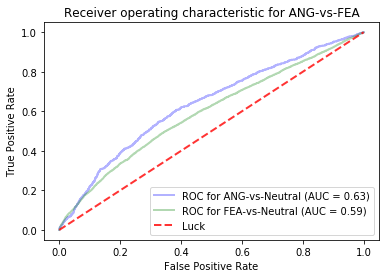

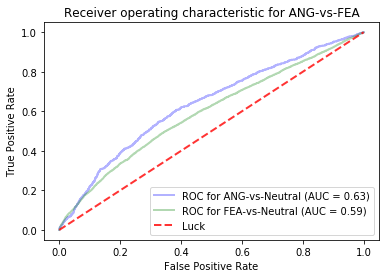

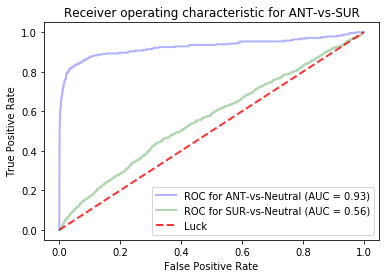

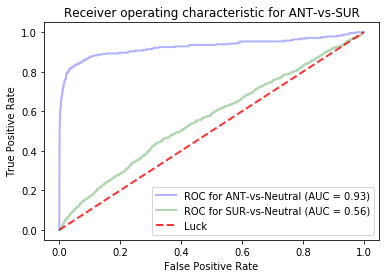

In [19]:
for emo_pair in emotions:
    print_roc_curve(results, emo_pair, "emo-vs-emo", "free-domain", "svm")
    
for emo_pair in emotions:
    print_roc_curve(results, emo_pair, "emo-vs-emo-vs-neutral", "free-domain", "svm")    
    print_roc_curve(results, emo_pair, "emo-vs-emo-vs-neutral", "free-domain", "svm")    

In [ ]:
print(clf.keys())

In [ ]:
for emo in ['JOY', 'SAD', 'TRU', 'DIS', 'SUR', 'FEA']:    
    clf['%s-vs-all' % emo] = pickle.load(open(os.path.join(models_dir,                         
                                                           'classifier_%s_vs_all_emolex.pkl' % emo), 'rb'), 
            encoding='latin1')


for emo in ['FEA', 'SUR', 'DIS', 'TRU', 'SAD', 'JOY']:        
    clf_key = '%s-vs-all' % emo
    print(clf_key)
    benchmark_classifier_one_vs_all(clf, emo, clf_key, dataframe_test, test_set, "emo-vs-all", "free-domain", "svm")

<h2>Testing on Stock market related corpus</h2>

In [20]:
stock_dataframe_test = pd.read_csv(os.path.join(dataset_dir, 'tweets_stocks_emolex.csv'), engine='c')

tfidf = pickle.load(open(os.path.join(models_dir, 'tfidf_vectorizer.pkl'), "rb"), encoding='latin1')
tfs = tfidf.transform(stock_dataframe_test['text'])
    
svd_transformer = pickle.load(open(os.path.join(models_dir, 'svd_transformer.pkl'), "rb"), encoding='latin1')

stock_svd_test = svd_transformer.transform(tfs)
    
stock_svd_and_emolex_test = stock_svd_test
for dim in ["emolex_joy","emolex_sad","emolex_trust",\
            "emolex_disgust","emolex_anger","emolex_fear",\
            "emolex_anticipation","emolex_surprise",\
            "emolex_positive","emolex_negative"]:
    stock_svd_and_emolex_test = np.c_[stock_svd_and_emolex_test, stock_dataframe_test[dim]]
                
stock_svd_and_emolex_test = normalizer.transform(stock_svd_and_emolex_test)

print(stock_svd_and_emolex_test.shape)

/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.18.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.18.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/fernando/libs/anaconda/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TruncatedSVD from version 0.18.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


(4517, 210)


In [24]:
from multiprocessing import Pool

pool = Pool()

#for clf_key in clf.keys():
            
#        key_0 = list(clf[clf_key].keys())[2]
#        key_1 = list(clf[clf_key].keys())[3]
        
for i in range(len(clf_keys)):
    
        clf_key = clf_keys[i]
        key_0 = emos[i][1]
        key_1 = emos[i][0]        
    
        Y, X, indexes = extract_emos_attrs_n_class(stock_dataframe_test, stock_svd_and_emolex_test, key_1, key_0)
    
        print("Testing emotion vs emotion")
        benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, "emo-vs-emo", "stock-domain", "svm")
    
        Y_neutral, X_neutral, indexes_neutral = extract_neutral_attrs_n_class_and_with_all_neutral(stock_dataframe_test, stock_svd_and_emolex_test, key_1, key_0)
    
        X = np.concatenate((X, X_neutral), axis=0)
        Y = np.concatenate((Y, np.array([2] * len(Y_neutral))), axis=0)
    
        print("Testing emotion vs emotion vs neutral")
        benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, "emo-vs-emo-vs-neutral", "stock-domain", "svm")
        

Testing emotion vs emotion
              precision    recall  f1-score   support

         SAD       0.51      0.50      0.51       437
         JOY       0.61      0.27      0.37       531
     neutral       0.00      0.00      0.00         0

   micro avg       0.37      0.37      0.37       968
   macro avg       0.37      0.26      0.29       968
weighted avg       0.57      0.37      0.43       968

		Confusion Matrix: 
Predicted as:	SAD	JOY	neutral
SAD tweets:	220	91	126
JOY tweets:	210	142	179
neutral tweets:	0	0	0


Testing emotion vs emotion vs neutral
              precision    recall  f1-score   support

         SAD       0.19      0.50      0.28       437
         JOY       0.13      0.27      0.18       531
     neutral       0.71      0.32      0.45      2339

   micro avg       0.34      0.34      0.34      3307
   macro avg       0.34      0.36      0.30      3307
weighted avg       0.55      0.34      0.38      3307

		Confusion Matrix: 
Predicted as:	SAD	JOY	neutral


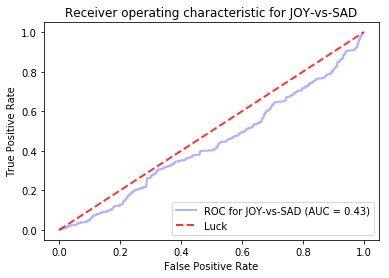

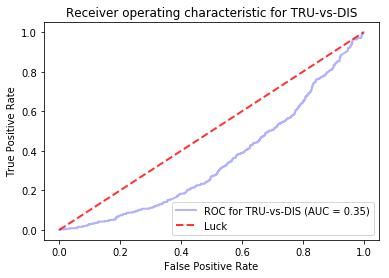

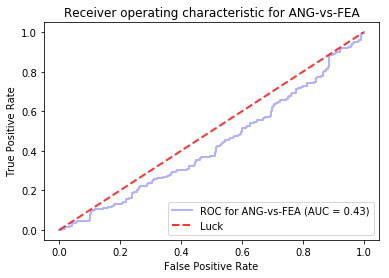

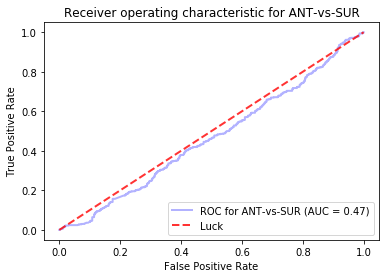

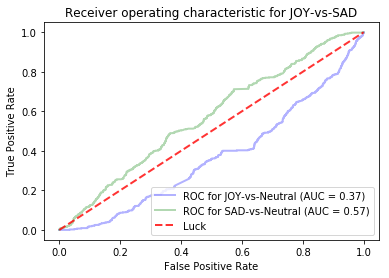

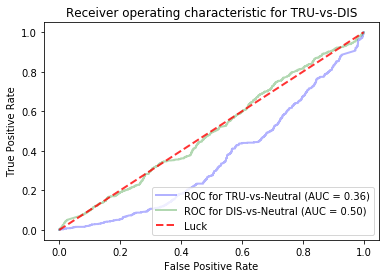

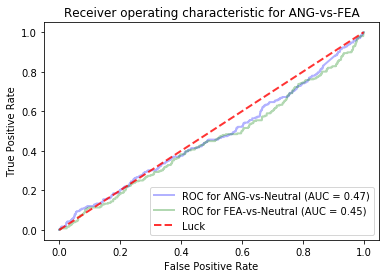

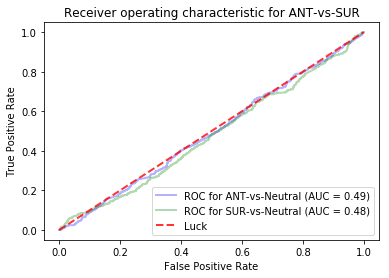

In [22]:
for emo_pair in emotions:
    print_roc_curve(results, emo_pair, "emo-vs-emo", "stock-domain", "svm")
    
for emo_pair in emotions:
    print_roc_curve(results, emo_pair, "emo-vs-emo-vs-neutral", "stock-domain", "svm")

Testing on full agreement subset

In [ ]:
stock_dataframe_test = pd.read_csv(os.path.join(dataset_dir, 'full_agreement/tweets_stocks_emolex.csv'), engine='c')

tfidf = pickle.load(open(os.path.join(models_dir, 'tfidf_vectorizer.pkl'), "rb"), encoding='latin1')
tfs = tfidf.transform(stock_dataframe_test['text'])
    
svd_transformer = pickle.load(open(os.path.join(models_dir, 'svd_transformer.pkl'), "rb"), encoding='latin1')

stock_svd_test = svd_transformer.transform(tfs)
    
stock_svd_and_emolex_test = stock_svd_test
for dim in ["emolex_joy","emolex_sad","emolex_trust",\
            "emolex_disgust","emolex_anger","emolex_fear",\
            "emolex_anticipation","emolex_surprise",\
            "emolex_positive","emolex_negative"]:
    stock_svd_and_emolex_test = np.c_[stock_svd_and_emolex_test, stock_dataframe_test[dim]]
                
stock_svd_and_emolex_test = normalizer.transform(stock_svd_and_emolex_test)

print(stock_svd_and_emolex_test.shape)

In [ ]:
pool = Pool()

#for clf_key in clf.keys():
            
#        key_0 = list(clf[clf_key].keys())[2]
#        key_1 = list(clf[clf_key].keys())[3]

for i in range(len(clf_keys)):
    
        clf_key = clf_keys[i]
        key_0 = emos[i][1]
        key_1 = emos[i][0]

        for k in list(clf[clf_key].keys()):
            if k in ['JOY', 'SAD', 'TRU', 'DIS', 'ANG', 'FEA', 'ANT', 'SUR']:
                if key_0 is None:
                    key_0 = k
                elif key_1 is None:
                    key_1 = k
                
                if key_0 != None and key_1 != None:
                    break
                
        print("key_0 = %s, key_1 = %s" % (key_0, key_1))
    
        Y, X, indexes = extract_emos_attrs_n_class(stock_dataframe_test, stock_svd_and_emolex_test, key_0, key_1)
        
        print("Testing emotion vs emotion")
        benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, "emo-vs-emo", "stock-domain-full-agreement", "svm")
        
        Y_neutral, X_neutral, indexes_neutral = extract_neutral_attrs_n_class(stock_dataframe_test, stock_svd_and_emolex_test, key_0, key_1)
    
        X = np.concatenate((X, X_neutral), axis=0)
        Y = np.concatenate((Y, np.array([2] * len(Y_neutral))), axis=0)
    
        print("Testing emotion vs emotion vs neutral")
        benchmark_classifier(clf, clf_key, X, Y, key_0, key_1, "emo-vs-emo-vs-neutral", "stock-domain-full-agreement", "svm")

<h3>Testing Deep Learning Models</h3>

In [ ]:
import keras

clf_dl = pickle.load(open(os.path.join(models_dir, 'probs_train_deep_neutral.pkl'), 'rb'))

clf_dl['JOY-vs-SAD']['model-dl'] = keras.models.load_model(os.path.join(models_dir, 
                                                                             'classifier_dl_JOY_vs_SAD_emolex.h5'))
        
clf_dl['TRU-vs-DIS']['model-dl'] = keras.models.load_model(os.path.join(models_dir, 
                                                                             'classifier_dl_TRU_vs_DIS_emolex.h5'))
        
clf_dl['ANG-vs-FEA']['model-dl'] = keras.models.load_model(os.path.join(models_dir, 
                                                                             'classifier_dl_ANG_vs_FEA_emolex.h5'))
        
clf_dl['ANT-vs-SUR']['model-dl'] = keras.models.load_model(os.path.join(models_dir, 
                                                                        'classifier_dl_ANT_vs_SUR_emolex.h5'))


In [ ]:
from nlp_utils.nlp_semantic import *

from nlp_utils.w2v import np_to_indexes

max_sentence_len = 400
vocabulary_inv = pickle.load(open(os.path.join(models_dir,'vocabulary_inv.pkl'), 'rb'))

x_test = np.array([[c for c in lex_tokenize(x)] for x in dataframe_test['text']])
x_test = np_to_indexes(x_test, vocabulary_inv, max_sentence_len)
print(x_test)

In [ ]:
def benchmark_classifier_dl(clf_dl, clf_key, X, Y, key_0, key_1, exp_name, corpus_name, alg_name):
    pred_prob = clf_dl[clf_key]['model-dl'].predict(X) 
    Y_pred_ = [int(prob[0] > 0.5) for prob in pred_prob]
    Y_prob = [(1.0-prob[0], prob[0]) for prob in pred_prob]
    
    print(clf_key)
    print(clf_dl[clf_key].keys())    
    
    print("%s threshold = %.2f" % (key_0, clf_dl[clf_key][key_0]['threshold-dl']))
    print("%s threshold = %.2f" % (key_1, clf_dl[clf_key][key_1]['threshold-dl']))
    
    #for pred, prob, real in zip(Y_pred_, Y_prob, Y):
    #    print("%s prob = %.2f, %s prob = %.2f; real = %d (%s), class = %s" % (emo_pair[0], prob[0],
    #                                                         emo_pair[1], prob[1],
    #                                                         real,
    #                                                         emo_pair[0] if real == 0 else emo_pair[1],
    #                                                         emo_pair[0] if pred ==  0 and prob[0] >= clf_dl[emo_pair_key][emo_pair[0]]['threshold-dl'] else \
    #                                                         emo_pair[1] if pred == 1 and prob[1] >= clf_dl[emo_pair_key][emo_pair[1]]['threshold-dl'] else \
    #                                                          "neutral"))
    
    #Y_pred = [0 if pred == 0 and prob[0] >= clf_dl[emo_pair_key][emo_pair[0]]['threshold-dl'] else \
    #              1 if pred == 1 and prob[1] >= clf_dl[emo_pair_key][emo_pair[1]]['threshold-dl'] else \
    #              2 for pred, prob in zip(Y_pred_, Y_prob)]
    
    Y_pred = [2 if prob[0] < clf_dl[clf_key][key_0]['threshold-dl'] and \
              prob[1] < clf_dl[clf_key][key_1]['threshold-dl'] else \
              pred for pred, prob in zip(Y_pred_, Y_prob)]                
    
    f1 = f1_score(Y, Y_pred, average='macro')
    acc = accuracy_score(Y, Y_pred)
    
    if not exp_name in results.keys():
        results[exp_name] = {}
        
    if not corpus_name in results[exp_name].keys():
        results[exp_name][corpus_name] = {}
        
    if not alg_name in results[exp_name][corpus_name].keys():
        results[exp_name][corpus_name][alg_name] = {clf_key:{'f1':None, 'acc': None}}
        
    if not clf_key in results[exp_name][corpus_name][alg_name].keys():
        results[exp_name][corpus_name][alg_name][clf_key] = {'f1':None, 'acc': None}
        
    results[exp_name][corpus_name][alg_name][clf_key]['f1'] = f1
    results[exp_name][corpus_name][alg_name][clf_key]['acc'] = acc
    
    print(classification_report(Y, Y_pred, target_names=[emo_pair[1], emo_pair[0], 'neutral']))
    
    print("\t\tConfusion Matrix: ")
    conf_matrix = confusion_matrix(Y, Y_pred)
        
    print("Predicted as:\t%s\t%s\t%s" % (key_1, key_0, "neutral"))
    print("%s tweets:\t%d\t%d\t%d" % (key_1, conf_matrix[0][0], conf_matrix[0][1], conf_matrix[0][2]))
    print("%s tweets:\t%d\t%d\t%d" % (key_0, conf_matrix[1][0], conf_matrix[1][1], conf_matrix[1][2]))
    print("%s tweets:\t%d\t%d\t%d" % ("neutral", conf_matrix[2][0], conf_matrix[2][1], conf_matrix[2][2]))
        
    print('\n')

In [ ]:
for emo_pair in emotions:
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])

    Y, X, indexes = extract_emos_attrs_n_class(dataframe_test, 
                                                            x_test, 
                                                            emo_pair[1], emo_pair[0])
    
    benchmark_classifier_dl(clf_dl, emo_pair_key, X, Y, emo_pair[1], emo_pair[0], "emo-vs-emo", "free-domain", "cnn")
    
    Y_neutral, X_neutral, indexes_neutral = extract_neutral_attrs_n_class(dataframe_test, 
                                                                              x_test, 
                                                                          emo_pair[1], emo_pair[0])
    
    X = np.concatenate((X, X_neutral), axis=0)
    Y = np.concatenate((Y, np.array([2] * len(Y_neutral))), axis=0)

    benchmark_classifier_dl(clf_dl, emo_pair_key, X, Y, emo_pair[1], emo_pair[0], "emo-vs-emo-vs-neutral", "free-domain", "cnn")

In [ ]:
print(vocabulary_inv)

Testing on stock market corpus

In [ ]:
stock_dataframe_test = pd.read_csv(os.path.join(dataset_dir, 'tweets_stocks_emolex.csv'), engine='c')
stock_x_test = np.array([[c for c in lex_tokenize(x)] for x in stock_dataframe_test['text']])
stock_x_test = np_to_indexes(stock_x_test, vocabulary_inv, max_sentence_len)

In [ ]:
for emo_pair in emotions:
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])
    
    Y, X, indexes = extract_emos_attrs_n_class(stock_dataframe_test, stock_x_test, emo_pair[1], emo_pair[0])
        
    benchmark_classifier_dl(clf_dl, emo_pair_key, X, Y, emo_pair[1], emo_pair[0], "emo-vs-emo", "stock-domain", "cnn")
        
    Y_neutral, X_neutral, indexes_neutral = extract_neutral_attrs_n_class(stock_dataframe_test, 
                                                                          stock_x_test, 
                                                                          emo_pair[1], emo_pair[0])
    
    X = np.concatenate((X, X_neutral), axis=0)
    Y = np.concatenate((Y, np.array([2] * len(Y_neutral))), axis=0)  
    
    benchmark_classifier_dl(clf_dl, emo_pair_key, X, Y, emo_pair[1], emo_pair[0], "emo-vs-emo-vs-neutral", "stock-domain", "cnn")

Testing on Full Agreement subcorpus

In [ ]:
stock_dataframe_test = pd.read_csv(os.path.join(dataset_dir, 'full_agreement/tweets_stocks_emolex.csv'), engine='c')
stock_x_test = np.array([[c for c in lex_tokenize(x)] for x in stock_dataframe_test['text']])
stock_x_test = np_to_indexes(stock_x_test, vocabulary_inv, max_sentence_len)

In [ ]:
for emo_pair in emotions:
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])
    
    Y, X, indexes = extract_emos_attrs_n_class(stock_dataframe_test, stock_x_test, emo_pair[1], emo_pair[0])
        
    benchmark_classifier_dl(clf_dl, emo_pair_key, X, Y, emo_pair[1], emo_pair[0], "emo-vs-emo", "stock-domain-full-agreement", "cnn")
        
    Y_neutral, X_neutral, indexes_neutral = extract_neutral_attrs_n_class(stock_dataframe_test, 
                                                                          stock_x_test, 
                                                                          emo_pair[1], emo_pair[0])
    
    X = np.concatenate((X, X_neutral), axis=0)
    Y = np.concatenate((Y, np.array([2] * len(Y_neutral))), axis=0)  
    
    benchmark_classifier_dl(clf_dl, emo_pair_key, X, Y, emo_pair[1], emo_pair[0], "emo-vs-emo-vs-neutral", "stock-domain-full-agreement", "cnn")

<h2>Testing SVM Tree with kernels</h2>

In [ ]:
def svm_tree_classifier(clf_key, key_0, key_1, exp_name, corpus_name, alg_name, logs_path, dataset_path):
    if alg_name == 'tk-mos':
        kernel_code = -1
    elif alg_name == 'tk-st':
        kernel_code = 0
    elif alg_name == 'tk-sst':
        kernel_code = 1
    elif alg_name == 'tk-sst-bow':
        kernel_code = 2
    elif alg_name == 'tk-pt':
        kernel_code = 3
    
    if corpus_name == 'free-domain':
        y_file_name = os.path.join(dataset_path, 'tweets_auto-tagged-emolex_test_svmlight_%s_vs_%s.txt' % (key_0, key_1))
        pred_file_name = os.path.join(logs_path, 'results-test-tree-kernel-model_%s_vs_%s_KERNEL_%d.txt' % (key_0, key_1, kernel_code))
    elif corpus_name == 'stock-domain':
        y_file_name = os.path.join(dataset_path, 'tweets_stocks_emolex_svmlight_%s_vs_%s.txt' % (key_0, key_1))
        pred_file_name = os.path.join(logs_path, 'results-test-tree-kernel-model_stocks_%s_vs_%s_KERNEL_%d.txt' % (key_0, key_1, kernel_code))
    else:
        y_file_name = os.path.join(dataset_path, 'full_agreement/tweets_stocks_emolex_svmlight_%s_vs_%s.txt' % (key_0, key_1))
        pred_file_name = os.path.join(logs_path, 'results-test-tree-kernel-model_stocks_full_agreement_%s_vs_%s_KERNEL_%d.txt' % (key_0, key_1, kernel_code))
    
    y_file = open(y_file_name, 'r')
    pred_file = open(pred_file_name, 'r')
    
    Y_pred = []
    Y = []
    
    y_line = y_file.readline()
    while y_line:
        c = int(y_line.split('\t')[0])
        Y.append(c if c > 0 else 0)
        y_line = y_file.readline()
        
    pred_line = pred_file.readline()
    while pred_line:
        c = float(pred_line)
        Y_pred.append(1 if c > 0.0 else 0)
        pred_line = pred_file.readline()
        
    Y_pred = np.array(Y_pred)
    Y = np.array(Y)
            
    f1 = f1_score(Y, Y_pred, average='macro')
    acc = accuracy_score(Y, Y_pred)
    
    if not exp_name in results.keys():
        results[exp_name] = {}
        
    if not corpus_name in results[exp_name].keys():
        results[exp_name][corpus_name] = {}
        
    if not alg_name in results[exp_name][corpus_name].keys():
        results[exp_name][corpus_name][alg_name] = {clf_key:{'f1':None, 'acc': None}}
        
    if not clf_key in results[exp_name][corpus_name][alg_name].keys():
        results[exp_name][corpus_name][alg_name][clf_key] = {'f1':None, 'acc': None}
        
    results[exp_name][corpus_name][alg_name][clf_key]['f1'] = f1
    results[exp_name][corpus_name][alg_name][clf_key]['acc'] = acc
    
        
    print(classification_report(Y, Y_pred, target_names=[key_1, key_0]))
        
    '''print("\t\tConfusion Matrix: ")
    conf_matrix = confusion_matrix(Y, Y_pred)
        
    print("Predicted as:\t%s\t%s\t%s" % (key_1, key_0, "neutral"))
    print("%s tweets:\t%d\t%d\t%d" % (key_1, conf_matrix[0][0], conf_matrix[0][1], conf_matrix[0][2]))
    print("%s tweets:\t%d\t%d\t%d" % (key_0, conf_matrix[1][0], conf_matrix[1][1], conf_matrix[1][2]))
    print("%s tweets:\t%d\t%d\t%d" % ("neutral", conf_matrix[2][0], conf_matrix[2][1], conf_matrix[2][2]))'''
        
    print('\n')

In [ ]:
logs_path = '../logs'
dataset_path = '../datasets'

for emo_pair in emotions:
    emo_pair_key = '%s-vs-%s' % (emo_pair[1], emo_pair[0])
    
    
    tk_list = ['tk-mos', 'tk-st', 'tk-sst', 'tk-sst-bow', 'tk-pt']
        
    for alg_name in tk_list:
        print("%s, free-domain" % alg_name)
        svm_tree_classifier(emo_pair_key, emo_pair[1], emo_pair[0], "emo-vs-emo", 'free-domain', alg_name, logs_path, dataset_path)
        print("%s, stock-domain" % alg_name)
        svm_tree_classifier(emo_pair_key, emo_pair[1], emo_pair[0], "emo-vs-emo", 'stock-domain', alg_name, logs_path, dataset_path)
        print("%s, stock-domain-full-agreement" % alg_name)
        svm_tree_classifier(emo_pair_key, emo_pair[1], emo_pair[0], "emo-vs-emo", 'stock-domain-full-agreement', alg_name, logs_path, dataset_path)

<h2>Final Results</h2>

In [ ]:
def print_exp_results(results, exp_name, score):
    from IPython.core.display import display, HTML
    
    results_html = "<table>\n"
    
    header1 = '<tr><th></th>\n'
    header2 = '<tr><td></td>\n'
    lines = {}
    for k in results[exp_name].keys():
        header1 += '<th colspan="%d">%s</th>\n' % (len(results[exp_name][k].keys()), k)
        for k2 in results[exp_name][k].keys():
            header2 += '<td>%s</td>\n' % k2
            
            for k3 in results[exp_name][k][k2].keys():
                if not k3 in lines.keys():
                    lines[k3] = '<td>%s</td>' % k3
                lines[k3] += '<td>%.3f</td>' % results[exp_name][k][k2][k3][score]
            
    results_html += header1 + "</tr>" + header2 + "</tr>"
    for k in lines.keys():
        results_html += "<tr>" + lines[k] + "</tr>\n"
        
    display(HTML(results_html))

In [ ]:
print('Show accuracy')
print_exp_results(results, "emo-vs-emo", 'acc')
#print_exp_results(results, "emo-vs-emo-vs-neutral", 'acc')

print('Show F1 Score')
print_exp_results(results, "emo-vs-emo", 'f1')
#print_exp_results(results, "emo-vs-emo-vs-neutral", 'f1')

In [26]:
# Saving results

with open('results_bench_svd_200.pkl', 'wb') as handle:
    pickle.dump(results, handle)
handle.close()